In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import pickle
%matplotlib inline 

In [2]:
dist_pickle = pickle.load( open( "wide_dist_pickle.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]

In [3]:
img = cv2.imread('test_image2.png')

In [4]:
nx = 8 # the number of inside corners in x
ny = 6 # the number of inside corners in y

In [5]:
undistorted = cv2.undistort(img, mtx, dist, None, mtx)

In [6]:
gray = cv2.cvtColor(undistorted,cv2.COLOR_BGR2GRAY)


In [7]:
ret, corners = cv2.findChessboardCorners(gray, (8,6), None)

In [8]:
src = np.float32([corners[0][0],corners[40][0],corners[47][0],corners[7][0]])

In [9]:
d = (corners[1][0][0]-corners[0][0][0])

In [10]:
dst = np.float32([((src[0][0]-2.5*d,src[0][1]-0.25*d)), (src[0][0]-2.5*d,src[1][1]+0.5*d), (src[2][0]+0.5*d,src[1][1]+0.5*d), (src[2][0]+0.5*d,src[0][1]-0.25*d)] )

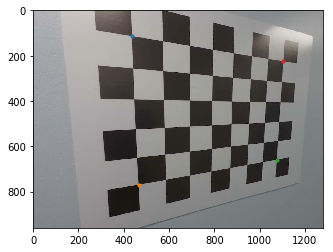

In [11]:
plt.imshow(undistorted)
plt.plot(src[0][0],src[0][1],'.')
plt.plot(src[1][0],src[1][1],'.')
plt.plot(src[2][0],src[2][1],'.')
plt.plot(src[3][0],src[3][1],'.')

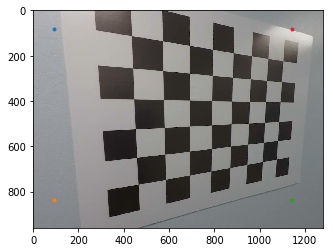

In [12]:
plt.imshow(undistorted)
plt.plot(dst[0][0],dst[0][1],'.')
plt.plot(dst[1][0],dst[1][1],'.')
plt.plot(dst[2][0],dst[2][1],'.')
plt.plot(dst[3][0],dst[3][1],'.')

In [13]:
dst

array([[  93.77438,   80.06229],
       [  93.77438,  837.136  ],
       [1144.058  ,  837.136  ],
       [1144.058  ,   80.06229]], dtype=float32)

In [14]:
src

array([[ 436.50708 ,  114.335556],
       [ 465.32727 ,  768.5894  ],
       [1075.5115  ,  658.0274  ],
       [1103.9984  ,  224.66327 ]], dtype=float32)

In [15]:
M = cv2.getPerspectiveTransform(src, dst)

In [16]:
warped = cv2.warpPerspective(undistorted, M, img.shape[1::-1], flags=cv2.INTER_LINEAR)

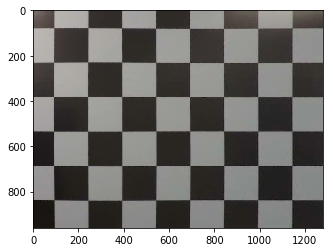

In [17]:
plt.imshow(warped)